# House grouping system using K-Means

<div style="text-align: center;">

## Loading the data set

</div>

In [303]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from pickle import dump

In [258]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'

data = pd.read_csv(url)
data.to_csv('../data/raw/housing.csv')

Selecting the important colums:

In [283]:
columns_to_keep = ['MedInc', 'Latitude', 'Longitude']
data = data[columns_to_keep]

In [284]:
data.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [285]:
data.shape

(20640, 3)

In [286]:
# Split Train and Test data:
X_train, X_test = train_test_split(data, test_size=0.3, random_state=42)

<div style="text-align: center;">

## Construction of K-Means

</div>


Optimal Cluster Search

In [287]:
WCSS = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    WCSS.append(kmeans.inertia_)

Elbow method:

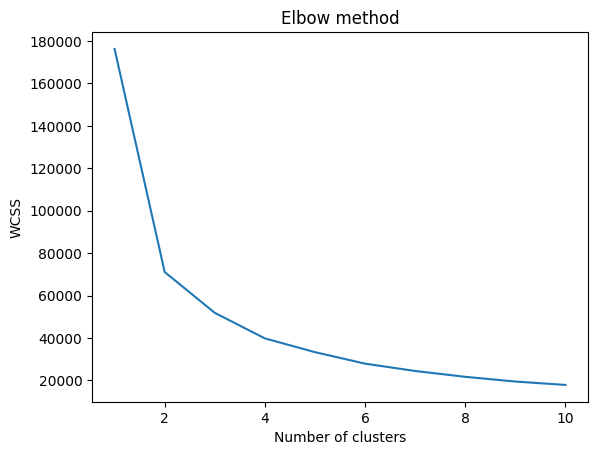

In [288]:
plt.plot(range(1, 11), WCSS)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can observe that from 4 onwards the graph begins to become constant, therefore, this is the point where we determine the most appropriate number of clusters for the model.

Modeling with Train data:

In [289]:
#  K-Means with 4 clusters
model = KMeans(n_clusters = 4, random_state=42)
model.fit(X_train)

KMeans(n_clusters=4, random_state=42)

In [290]:
# Get the cluster labels assigned to each data point
X_train['Cluster'] = model.labels_

X_train1 = X_train

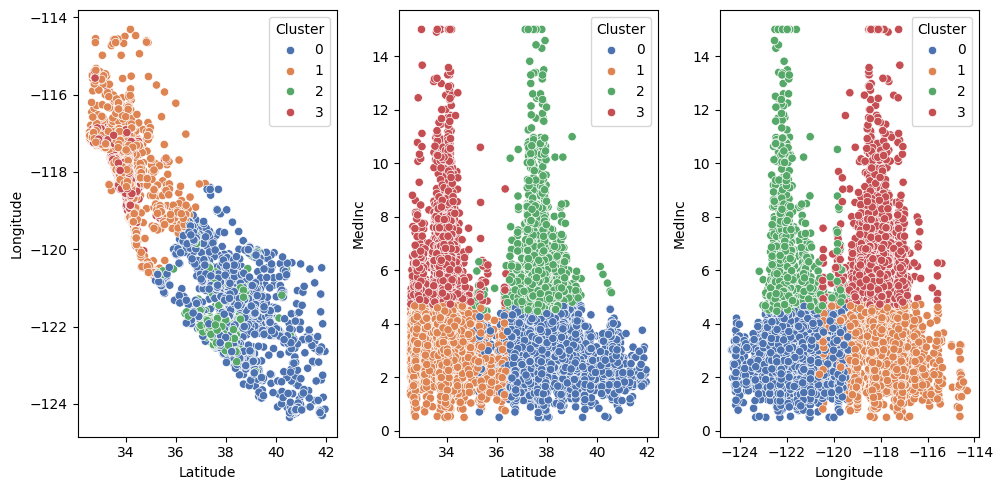

In [291]:
fig, axis = plt.subplots(1, 3, figsize = (10, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "deep")
plt.tight_layout()

plt.show()

In the graphs, different associations of points are observed that correspond to different clusters according to a color. This for the Train data set.

Modeling with test data:

In [297]:
y_test = model.predict(X_test)
X_test["Cluster"] = y_test
X_test1 = X_test
X_test.head()

,MedInc,Latitude,Longitude,Cluster
20046,1.6812,36.06,-119.01,1
3024,2.5313,35.14,-119.46,1
15663,3.4801,37.80,-122.44,0
20484,5.7376,34.28,-118.72,3
9814,3.7250,36.62,-121.93,0


<div style="text-align: center;">

## Predict Test data

</div>

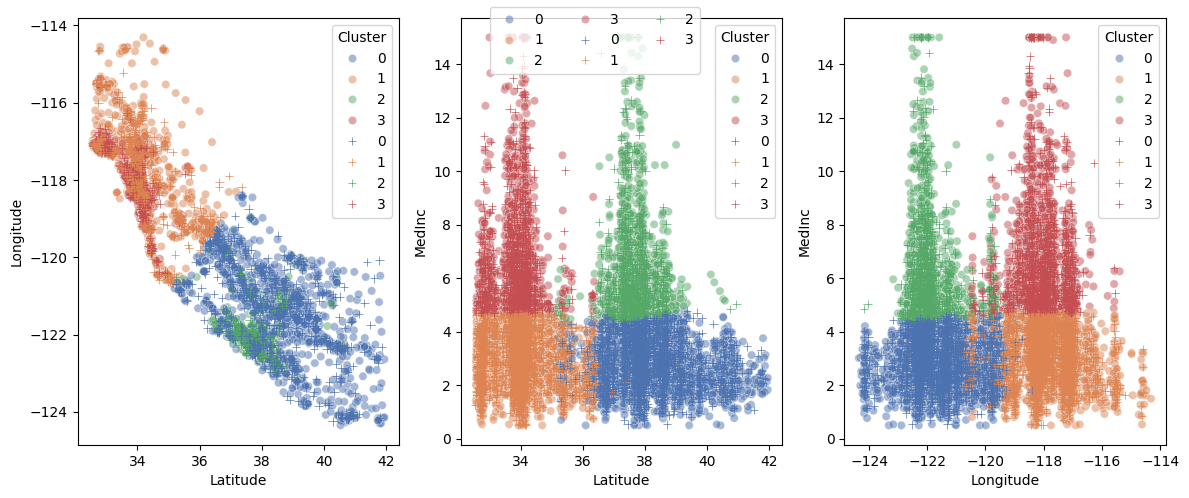

In [294]:
fig, axis = plt.subplots(1, 3, figsize = (12, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "deep", alpha  = 0.5)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "deep", alpha  = 0.5)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "deep", alpha  = 0.5)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "deep", marker = "+")

plt.tight_layout()

# Añadir leyendas con un solo gráfico
handles, labels = axis[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3)

plt.show()


In these graphs the clusters found in the prediction of the test data set are superimposed and it is observed that they visually correspond with the colors of the trained clusters.

<div style="text-align: center;">

## Supervised Classification Model (Random Forest)

</div>

In [295]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [298]:
X_train= X_train1.drop(["Cluster"], axis=1)
y_train = X_train1["Cluster"]
X_test= X_test1.drop(["Cluster"], axis=1)
y_test = X_test1["Cluster"]

Search the best hyperparameters:

In [226]:
num_trees = [50, 100, 150, 200, 250]

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': num_trees,
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.9968160580462104


Replace the best parameters in the Random Forest model

In [299]:
# Define the best parameters obtained from GridSearchCV
best_params = {
    'bootstrap': False,
    'max_depth': 20,
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 100
}

# Create the Random Forest classifier with the best parameters
best_rf_clf = RandomForestClassifier(**best_params, random_state=42)

# Train the model with the entire training data
best_rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=5,
                       random_state=42)

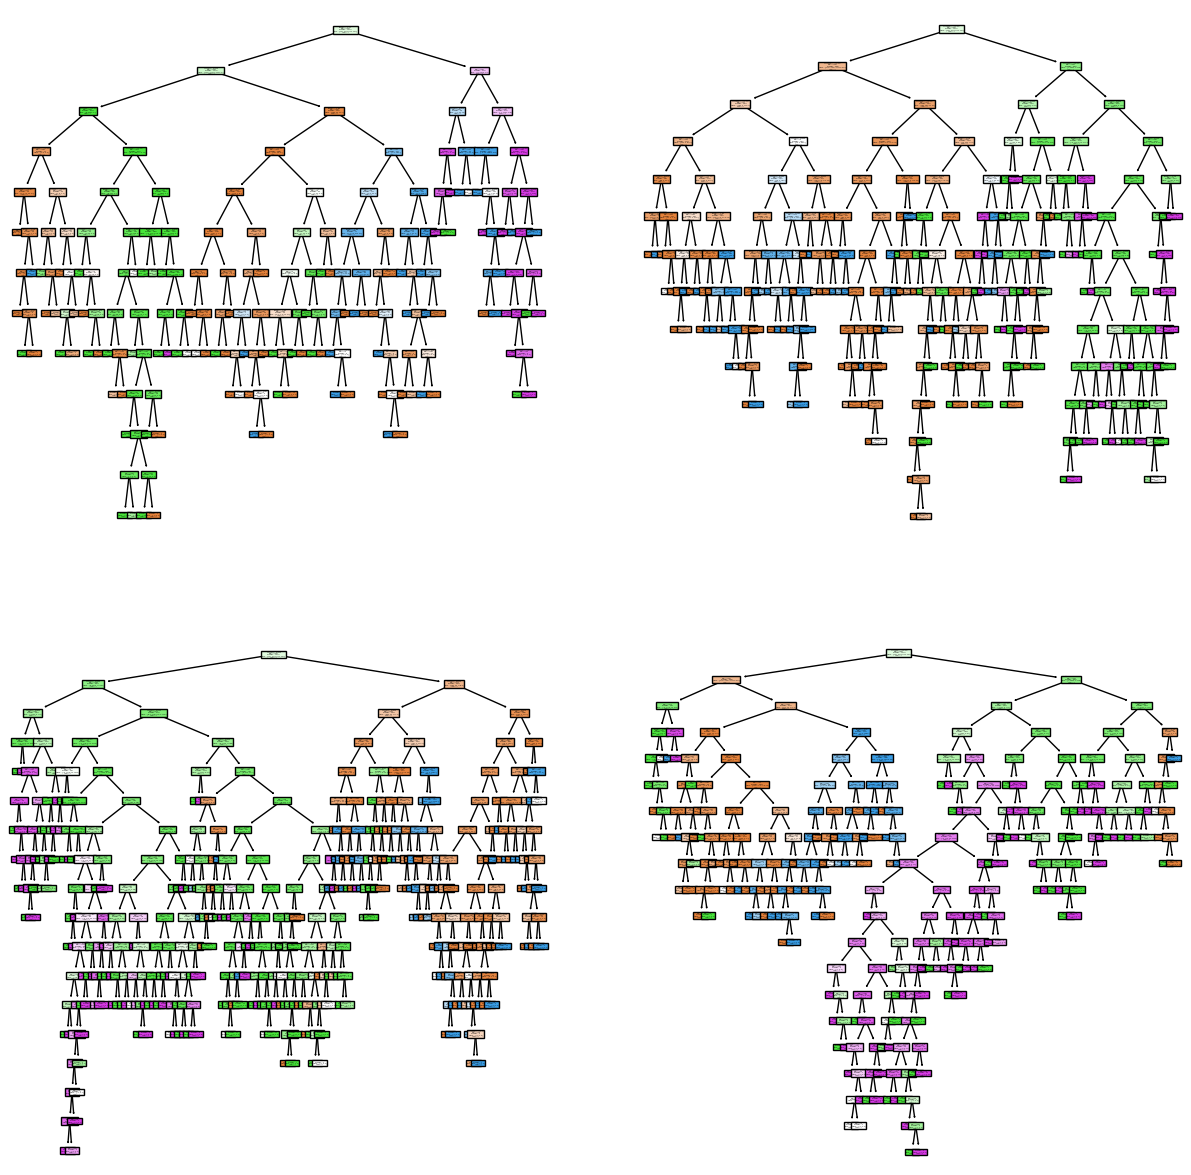

In [300]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees out of the 100 generated (default)
plot_tree(best_rf_clf[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3"], filled = True)
plot_tree(best_rf_clf[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3"], filled = True)
plot_tree(best_rf_clf[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3"], filled = True)
plot_tree(best_rf_clf[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3"], filled = True)

plt.show()

In [301]:
y_pred = best_rf_clf.predict(X_train)

# Metrics:
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
recall = recall_score(y_train, y_pred, average='weighted')
f1 = f1_score(y_train, y_pred, average='weighted')
conf_matrix= confusion_matrix(y_train, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print('Confusion Matriz:')
print(conf_matrix)

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
Confusion Matriz:
[[4407    0    0    0]
 [   0 6104    0    0]
 [   0    0 1713    0]
 [   0    0    0 2224]]


In [302]:
test_pred = best_rf_clf.predict(X_test)

test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred, average='weighted')
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
conf_matrix1= confusion_matrix(y_test, test_pred)

print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')
print(f'F1-score: {test_f1:.4f}')
print('Confusion Matriz:')
print(conf_matrix1)


Accuracy: 0.9973
Precision: 0.9973
Recall: 0.9973
F1-score: 0.9973
Confusion Matriz:
[[1869    2    4    0]
 [   1 2666    0    3]
 [   5    0  688    0]
 [   0    2    0  952]]


CONCLUSION:

From the Random Forest we obtain Accuracy, Precision, Recall, F1-Score metrics very close to 1; Therefore, it could be stated that the random forest method has predicted the results well and that the Clustering model has successfully grouped the data.

Save the models:

In [304]:
dump(model, open("../models/k-means_nc_4.sav", "wb"))
dump(best_rf_clf, open("../models/rfc-nestimators100_maxdepth20_minsamplesleaf1.sav", "wb"))